In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from src.dm import AllDataModule

dm = AllDataModule(train_trans={
	'HorizontalFlip': {}, 'VerticalFlip': {}
})
dm.setup()

train: 1587395
val: 40080
test: 36421


In [15]:
batch = next(iter(dm.train_dataloader(batch_size=5)))

rgb, nir, alt, lc = batch['rgb'], batch['rgb'], batch['alt'], batch['lc']

rgb.shape, nir.shape, alt.shape, lc.shape

(torch.Size([5, 256, 256, 3]),
 torch.Size([5, 256, 256, 3]),
 torch.Size([5, 256, 256]),
 torch.Size([5, 256, 256]))

In [16]:
rgb.dtype, nir.dtype, alt.dtype, lc.dtype

(torch.uint8, torch.uint8, torch.int16, torch.uint8)

In [17]:
rgb.max(), nir.max(), alt.max(), lc.max()

(tensor(255, dtype=torch.uint8),
 tensor(255, dtype=torch.uint8),
 tensor(271, dtype=torch.int16),
 tensor(17, dtype=torch.uint8))

In [18]:
rgb.min(), nir.min(), alt.min(), lc.min()

(tensor(0, dtype=torch.uint8),
 tensor(0, dtype=torch.uint8),
 tensor(11, dtype=torch.int16),
 tensor(1, dtype=torch.uint8))

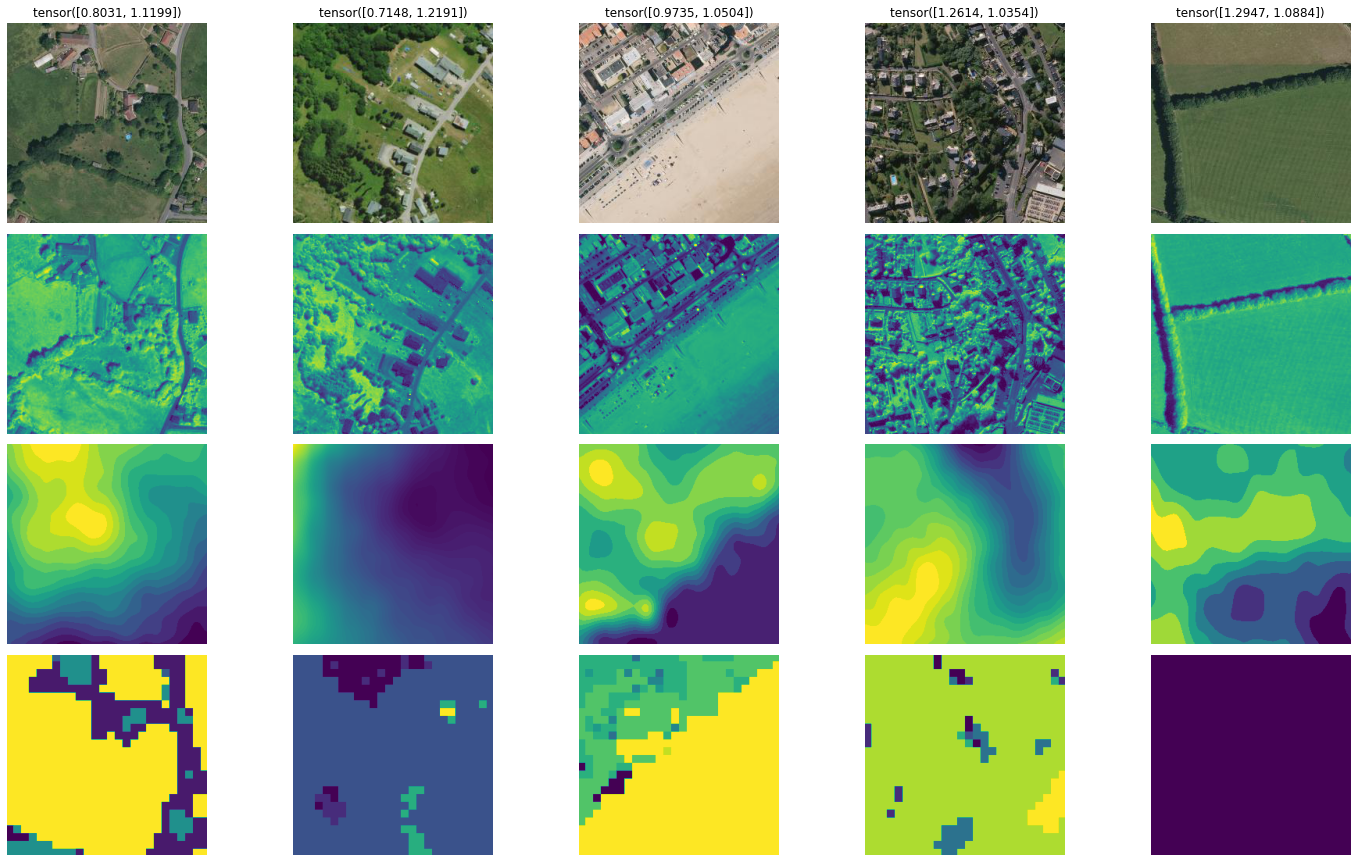

In [31]:
import matplotlib.pyplot as plt 

batch = next(iter(dm.train_dataloader(batch_size=5, shuffle=False)))
fig = plt.figure(figsize=(20, 15))
for ix in range(5):
	ax = plt.subplot(5, 5, ix + 1)
	ax.imshow(batch['rgb'][ix])
	ax.axis('off')
	ax.set_title(batch['latlng'][ix])
	ax = plt.subplot(5, 5, ix + 1 + 5)
	ax.imshow(batch['nir'][ix])
	ax.axis('off')
	ax = plt.subplot(5, 5, ix + 1 + 5*2)
	ax.imshow(batch['alt'][ix])
	ax.axis('off')
	ax = plt.subplot(5, 5, ix + 1 + 5*3)
	ax.imshow(batch['lc'][ix])
	ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
# from concurrent.futures import ThreadPoolExecutor
# from tqdm import tqdm
# from skimage.io import imread

# def compute_min_max(sample):
#     country_id = str(sample)[0]
#     country = 'fr' if country_id == '1' else 'us'
#     subfolder = str(sample)[-2:]
#     subsubfolder = str(sample)[-4:-2]
#     path = './data/patches-' + country + '/' + subfolder + '/' + subsubfolder + '/' + str(sample) + '_altitude.tif'
#     img = imread(path)
#     path2 = './data/patches-' + country + '/' + subfolder + '/' + subsubfolder + '/' + str(sample) + '_landcover.tif'
#     img2 = imread(path2)
#     return img.max(), img.min(), img2.max(), img2.min()


# with ThreadPoolExecutor() as pool:
#     with tqdm(total=len(dm.data)) as progress:
#         futures = []

#         for sample in dm.data.observation_id.values:
#             future = pool.submit(compute_min_max, sample) 
#             future.add_done_callback(lambda p: progress.update())
#             futures.append(future)

#         results = []
#         for future in futures:
#             result = future.result()
#             results.append(result)

In [9]:
import numpy as np 

# alt_max = [i[0] for i in results]
# alt_min = [i[1] for i in results]
# lc_max = [i[2] for i in results]
# lc_min = [i[3] for i in results]

# (4396, -85, 33, 0)
# np.array(alt_max).max(), np.array(alt_min).min(), np.array(lc_max).max(), np.array(lc_min).min()

In [12]:
from src.module import  AllModule

hparams = {
	'backbone': 'resnet18',
    'pretrained': True,
    'optimizer': 'Adam',
    'mlp_layers': [256, 512],
    'mlp_dropout': 0.,
    'optimizer_params': {
        'lr': 1e-3
    },
}

module = AllModule(hparams)

outputs = module(batch)
outputs.shape

torch.Size([5, 17037])